# 1. はじめに

このノートブックは、Google Colab環境での実行を想定しています。  
予め左のメニューから、「ファイル」→「ドライブをマウント」でGoogle Driveへ接続可能な状態にしておいてください。

# 2. 必要なライブラリのインストール

In [ ]:
# カレントディレクトリの移動
%cd /content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix

Colabではセッションが切れる度に初期状態へリセットされるため、セッション立ち上げ毎に必要なライブラリをインストールしてください。

In [ ]:
# 必要なライブラリのインストール
!pip install -r requirements.txt

# 3. モデルのテスト

テストには、事前訓練済みモデルと訓練したモデルを使用する2パターンがあります。  
テストする画像は`test_imgs`にアップロードするか、サンプル画像を使用してください。  
以下のセルで結果を保存するためのフォルダを作成します。

In [ ]:
# カレントディレクトリの移動
%cd /content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix

In [ ]:
# 結果フォルダの作成
if os.path.exists('tmp') == False:
    os.makedirs('tmp/detect_face')
    os.makedirs('tmp/resize')
    os.makedirs('tmp/result')

## 3-1. 事前訓練済みモデルでのテスト

In [ ]:
# カレントディレクトリの移動
%cd /content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix

まずはじめに、事前訓練済みのモデルをダウンロードします。

In [ ]:
# 事前訓練済みモデルのダウンロード
import urllib.request
import os

if os.path.exists('checkpoints') == True:
    os.mkdir('checkpoints/pre_face2mask')
else:
    os.makedirs('checkpoints/pre_face2mask')

url = 'https://www.dropbox.com/s/evg6btd2d7h8a9o/120_net_G.pth?dl=1'
file_name = '/content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix/checkpoints/pre_face2mask/120_net_G.pth'
urllib.request.urlretrieve(url, file_name)

以下のセルでテストを実行します。  
`test_face2mask.py`の各オプションは以下の通り。

- --testdata　テストする画像のパス指定
- --name　使用するモデルの名前
- --model　使用するモデルの種類
- --epoch　モデルのepoch数の指定
- --gpu_ids　-1のときCPU、0のときGPUでテスト実行

その他のオプションは`options`を参照してください。

In [ ]:
!python test_face2mask.py --testdata ./test_imgs/sample1.jpg --name pre_face2mask --model pix2pix --epoch 120 --gpu_ids -1

テスト結果は`tmp`に保存されます。

## 3-2. 訓練したモデルでのテスト

In [ ]:
# カレントディレクトリの移動
%cd /content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix

`train.ipynb`で訓練したモデルを使用して、テストします。

以下のセルでテストを実行します。  
`test_face2mask.py`の各オプションは以下の通り。

- --testdata　テストする画像のパス指定
- --name　使用するモデルの名前
- --model　使用するモデルの種類
- --epoch　モデルのepoch数の指定
- --gpu_ids　-1のときCPU、0のときGPUでテスト実行

その他のオプションは`options`を参照してください。

In [ ]:
!python test_face2mask.py --testdata ./test_imgs/sample1.jpg --name face2mask --model pix2pix --epoch 200 --gpu_ids -1

テスト結果は`tmp`に保存されます。

# 4. 結果の表示

In [ ]:
# カレントディレクトリの移動
%cd /content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix

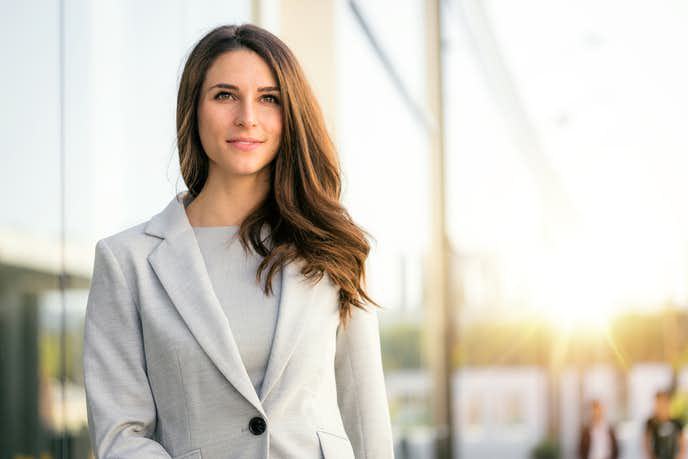

In [ ]:
# 入力画像の表示
from PIL import Image

img = Image.open('test_imgs/sample1.jpg')
img

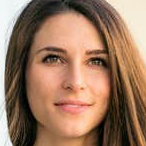

In [ ]:
# 検出された顔画像の表示
from PIL import Image
import os

def get_concat_v(imgs):
    imgs_width = []
    imgs_height = 0
    for img in imgs:
        imgs_width.append(img.width)
        imgs_height += img.height
    imgs_width = max(imgs_width)

    dst = Image.new('RGB', (imgs_width, imgs_height))
    imgs_height = 0
    for img in imgs:
        dst.paste(img, (0, imgs_height))
        imgs_height += img.height
    
    return dst

faces_name = os.listdir('tmp/detect_face')
imgs = []
for face_name in faces_name:
    img_path = os.path.join('tmp/detect_face', face_name)
    img = Image.open(img_path)
    imgs.append(img)

get_concat_v(imgs)

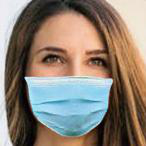

In [ ]:
# pix2pixモデルでマスクを付与した顔画像の表示
from PIL import Image
import os

def get_concat_v(imgs):
    imgs_width = []
    imgs_height = 0
    for img in imgs:
        imgs_width.append(img.width)
        imgs_height += img.height
    imgs_width = max(imgs_width)

    dst = Image.new('RGB', (imgs_width, imgs_height))
    imgs_height = 0
    for img in imgs:
        dst.paste(img, (0, imgs_height))
        imgs_height += img.height
    
    return dst

faces_name = os.listdir('tmp/resize')
imgs = []
for face_name in faces_name:
    img_path = os.path.join('tmp/resize', face_name)
    img = Image.open(img_path)
    imgs.append(img)

get_concat_v(imgs)

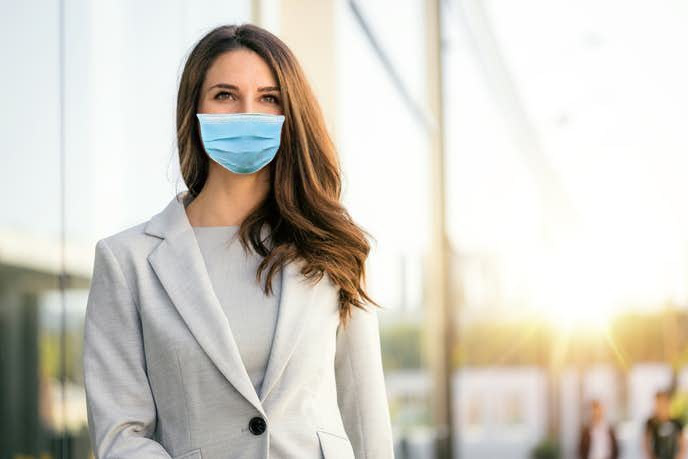

In [ ]:
# 出力結果画像の表示
from PIL import Image

img = Image.open('tmp/result/sample1_masked.jpg')
img